<a href="https://colab.research.google.com/github/vinayakpotdar2114/Daily-Assignemnts/blob/main/Day_5__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON**

## 1. Write a Python program to create a list whose ith element is the maximum of the first i elements from a input list.

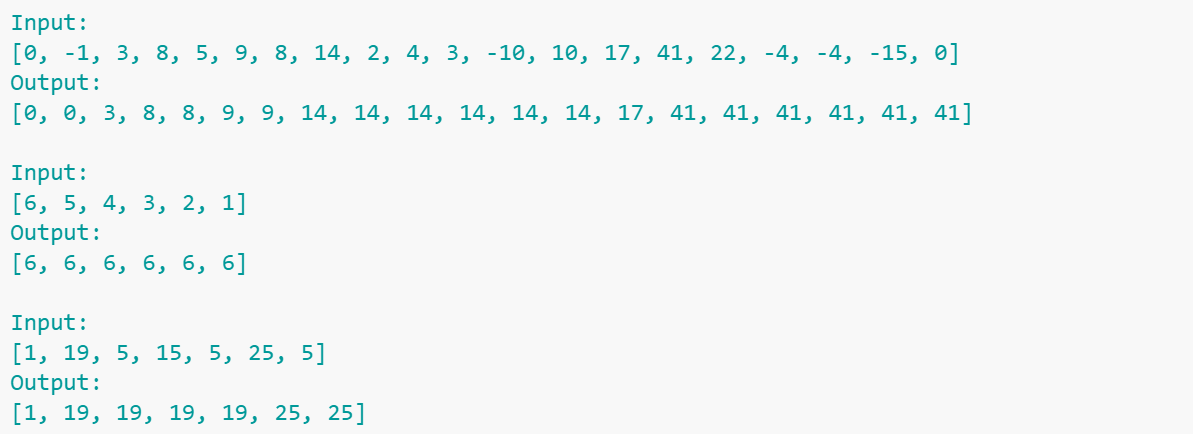

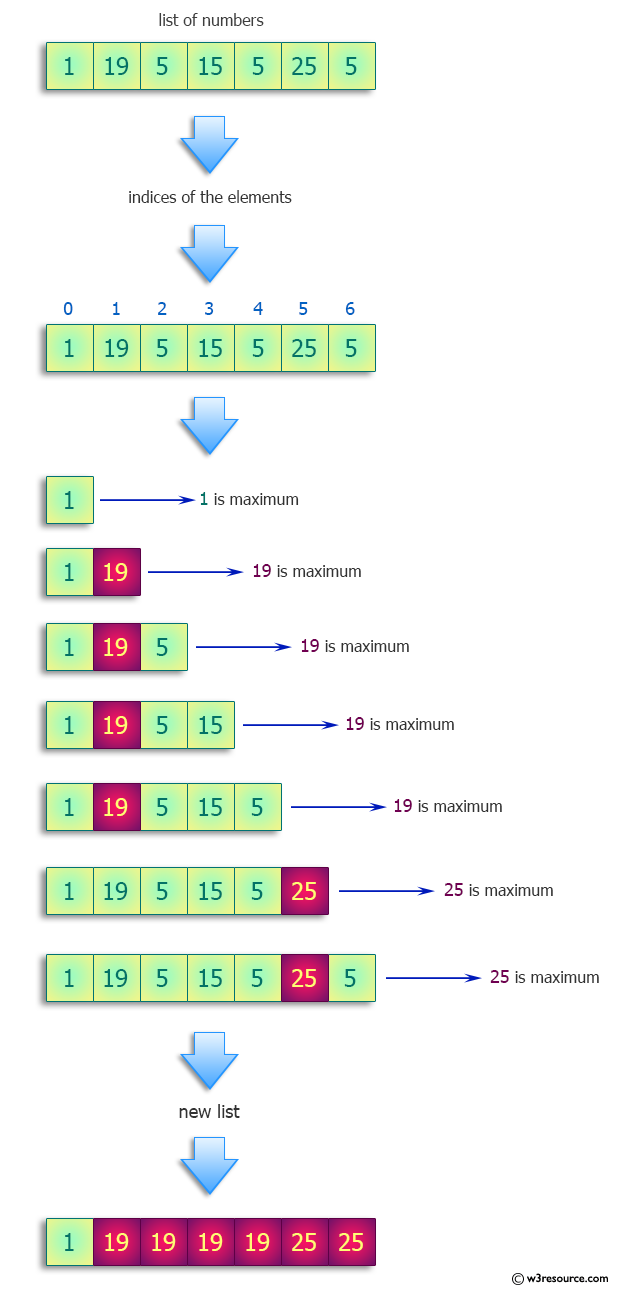

In [14]:
# Write Your code here.

# def checker(list1):
#   list2=[]
#   #list2.append(list1[0])
#   for i in list1:
#     if i > i+1:
#       list2.append(i)
#     else:
#       continue
#   return list2


# this will take up resources and wont work properly

In [17]:
# referenced a website and understood that I can understand max instead of comparing each element
def checker(elements):
    return [max(elements[:i]) for i in range(1, len(elements) + 1)]

In [18]:
list1 = [1,19,5,15,5,25,5]
print(checker(list1))

[1, 19, 19, 19, 19, 25, 25]


In [19]:
list2 = [0, -1, 3, 8, 5, 9, 8, 14, 2, 4, 3, -10, 10, 17, 41, 22, -4, -4, -15, 0]
print(checker(list2))

[0, 0, 3, 8, 8, 9, 9, 14, 14, 14, 14, 14, 14, 17, 41, 41, 41, 41, 41, 41]


## 2. Write a Python program to find the coordinates of a triangle with the given side lengths.

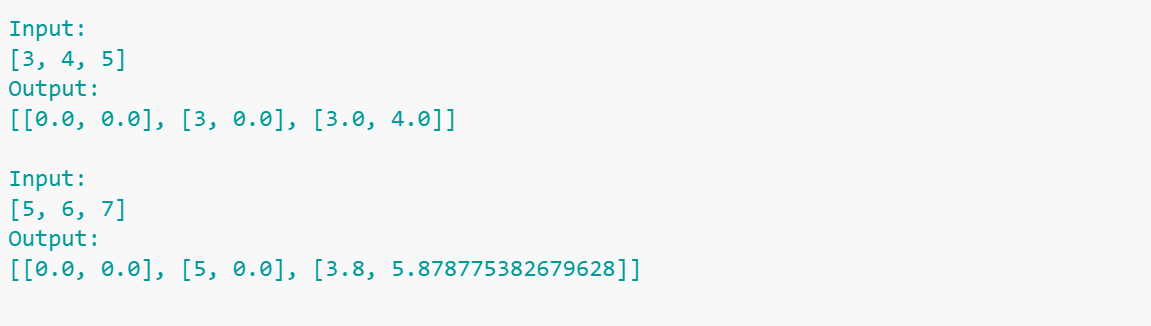

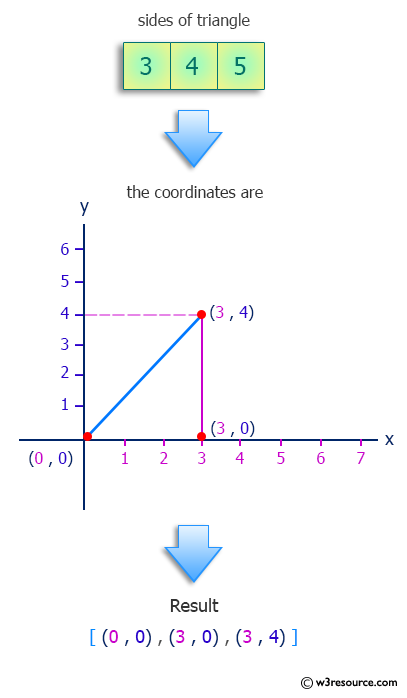

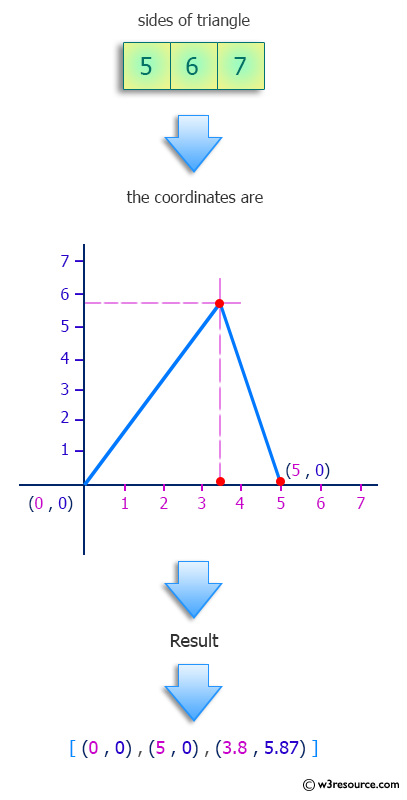

In [21]:
# Write Your code here.
# This was tough to do without the hero's formula.. This is a copied snippet instead
def trainglefinder(coordinates):
   a, b, c = sorted(coordinates)
   s = sum(coordinates) / 2
   area = (s * (s - a) * (s - b) * (s - c)) ** 0.5
   y = 2 * area / a
   x = (c ** 2 - y ** 2) ** 0.5
   return [[0.0, 0.0], [a, 0.0], [x, y]]


In [23]:
points = [3, 4, 5]
trainglefinder(points)

[[0.0, 0.0], [3, 0.0], [3.0, 4.0]]

# **SQL**

## 3. From the following dataframes, write an SQL query to find the best seller by total sales price. Return distributor ID , If there is a tie, report them all.


**Create Dataframe 1:item**

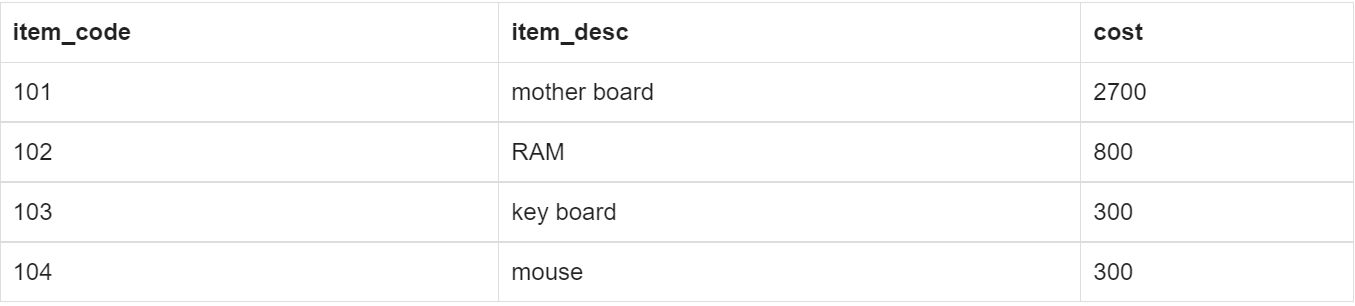

**Create Dataframe 2: sales_info**

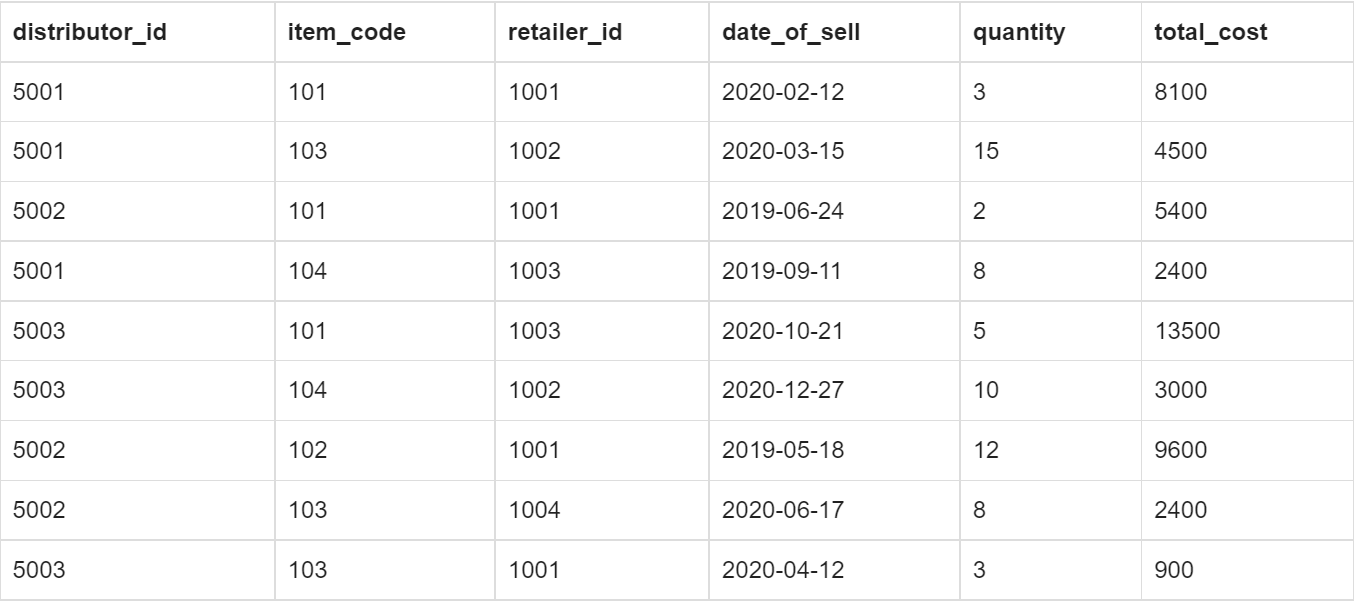

**Expected Output:**


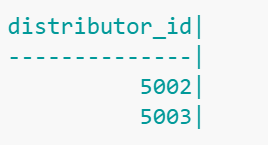

In [4]:
# Install SQlite & Pandasql
!pip install db-sqlite3
!pip install pandasql

# Importing Libraries
import pandas as pd
import sqlite3
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())


# Connection to DataBase
conn = sqlite3.connect('test5_database') 
c = conn.cursor()

# Create table
c.execute('''DROP TABLE IF EXISTS item;''')

c.execute('''CREATE TABLE item (
[item_code] INTEGER,
[item_desc] VARCHAR,
[cost]  INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO item VALUES(101,'mother board',	2700);''') 
c.execute('''INSERT INTO item VALUES(102,'RAM',	800);''') 
c.execute('''INSERT INTO item VALUES(103,'key board',300);''') 
c.execute('''INSERT INTO item VALUES(104,'mouse',300);''') 



# Create table
c.execute('''DROP TABLE IF EXISTS sales_info;''')

c.execute('''CREATE TABLE sales_info (
[distributor_id] INTEGER,
[item_code] INTEGER,
[retailer_id]  INTEGER,
[date_of_sell] DATE,
[quantity] INTEGER,
[total_cost] INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO sales_info VALUES(5001,101,1001,'2020-02-12',3,8100);''')
c.execute('''INSERT INTO sales_info VALUES(5001,103,1002,'2020-03-15',15,4500);''')
c.execute('''INSERT INTO sales_info VALUES(5002,101,1001,'2019-06-24',2,5400);''')
c.execute('''INSERT INTO sales_info VALUES(5001,104,1003,'2019-09-11',8,2400);''')
c.execute('''INSERT INTO sales_info VALUES(5003,101,1003,'2020-10-21',5,13500);''')
c.execute('''INSERT INTO sales_info VALUES(5003,104,1002,'2020-12-27',10,3000);''')
c.execute('''INSERT INTO sales_info VALUES(5002,102,1001,'2019-05-18',12,9600);''')
c.execute('''INSERT INTO sales_info VALUES(5002,103,1004,'2020-06-17',8,2400);''')
c.execute('''INSERT INTO sales_info VALUES(5003,103,1001,'2020-04-12',3,900);''')

conn.commit()

# Get DataFrame
conn = sqlite3.connect('test5_database') 
item = pd.read_sql_query ('''SELECT * FROM item''',conn)
sales_info = pd.read_sql_query ('''SELECT * FROM sales_info''',conn)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 4.3 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=aa9f5cc2c58246086dd2cf857c9dd102c776f95cb53b6a679d25ffd462adfc2e
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3895 sha256=249a3f12cc7bd4b96a7e64b5e706eb1b693416f7c4338b3d46c9332ad72c0d9d
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31679 sha256=26e6cd46311721f7b71540601e6a516bdc56d9c94069cc91a37b3d3f36ed08e8
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm
Looking in indexes: https://pypi

In [5]:
# Write Your code here.
mysql('''SELECT DISTINCT distributor_id FROM sales_info GROUP BY distributor_id HAVING SUM(total_cost)=(SELECT SUM(total_cost) AS total_price FROM sales_info GROUP BY distributor_id ORDER BY total_price DESC LIMIT 2)''')

,distributor_id
0,5002
1,5003


## 4. From the above dataframes, write a SQL query to find those retailers who have bought 'key board' but not 'mouse'. 
## Return retailer ID.

**Expected Output:** 

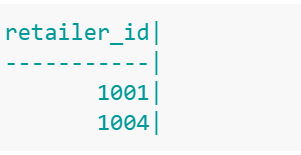

In [7]:
# Write Your code here.
mysql('''SELECT retailer_id FROM sales_info JOIN item USING(item_code) WHERE item_desc IN ('mouse', 'key board') GROUP BY retailer_id HAVING SUM(DISTINCT item_code)=(SELECT item_code FROM item WHERE item_desc = 'key board');''')

,retailer_id
0,1001
1,1004


# **MATH**

## 5. You grow 20 crystals from a solution and measure the length of each crystal in millimeters. Here is your data:

## 9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4

## Calculate the sample standard deviation of the length of the crystals.

**Solve this on a piece of paper and submit the image.**

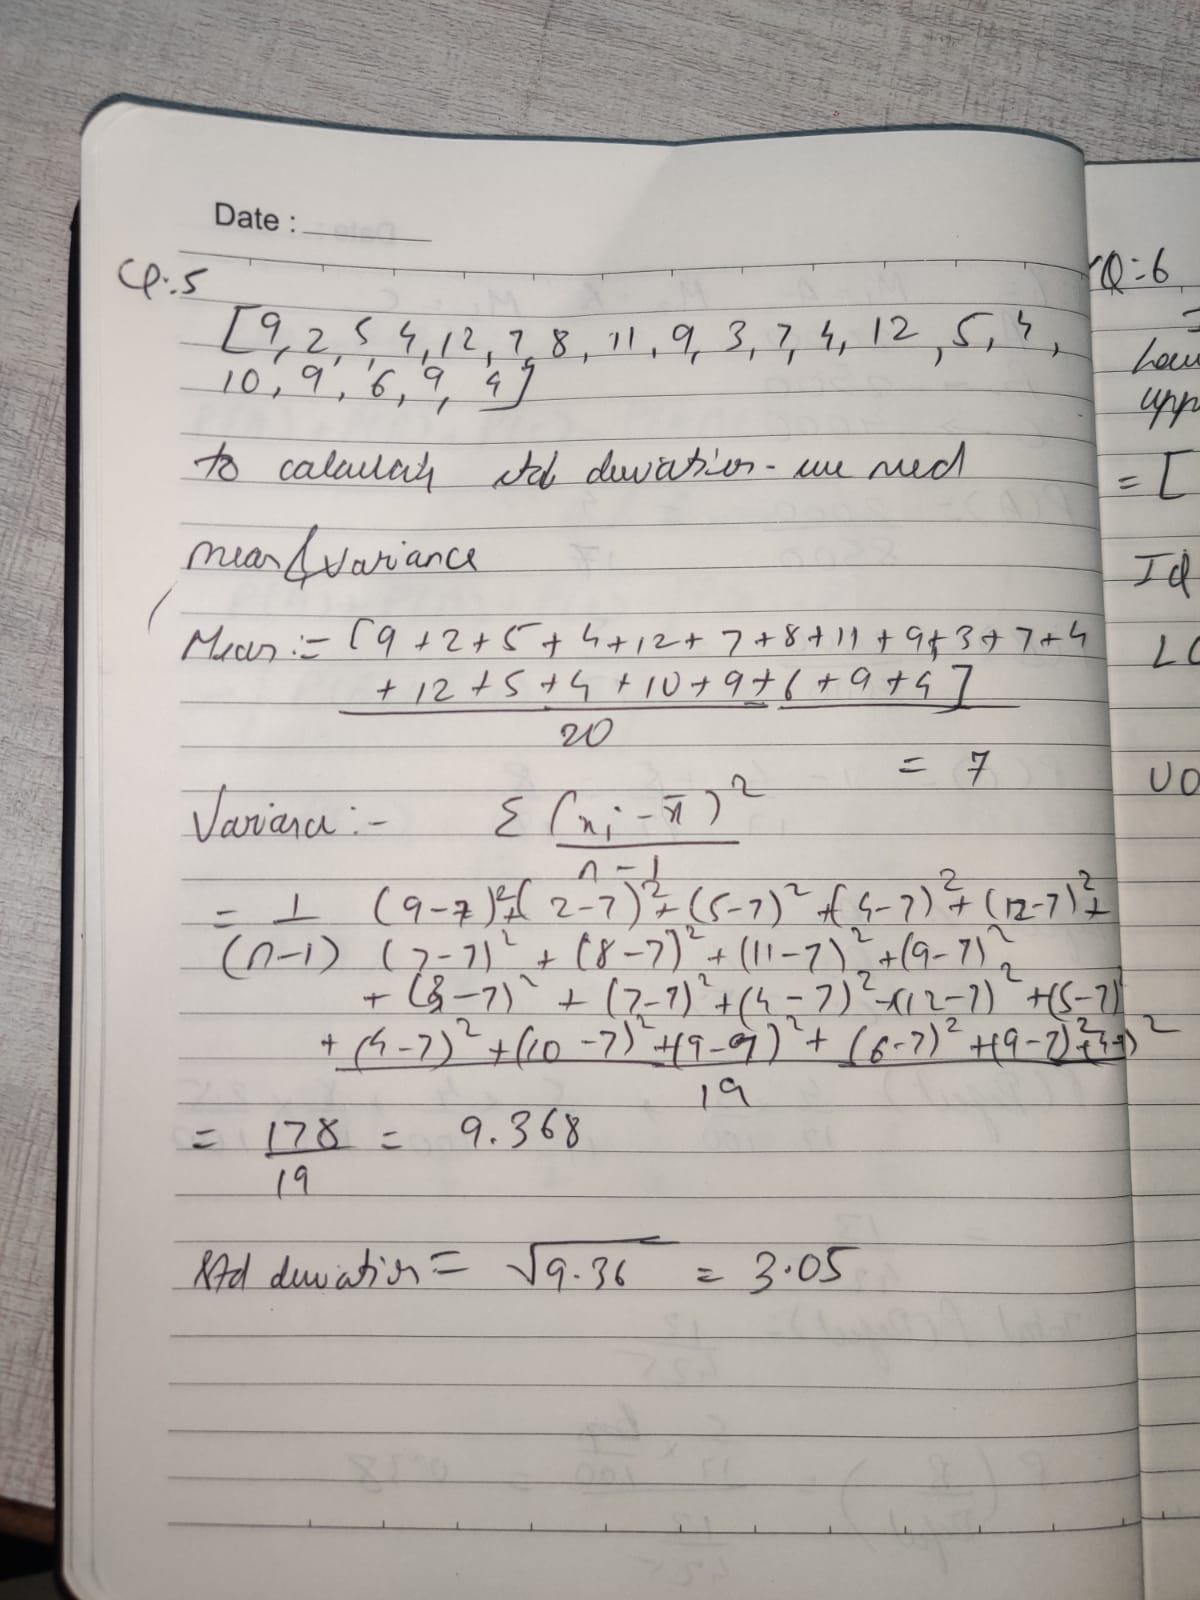Upload Your answer here.

## 6. Determine the interquartile range, lower outlier threshold and upper outlier threshold value for the first ten prime numbers.

**Solve this on a piece of paper and submit the image.**

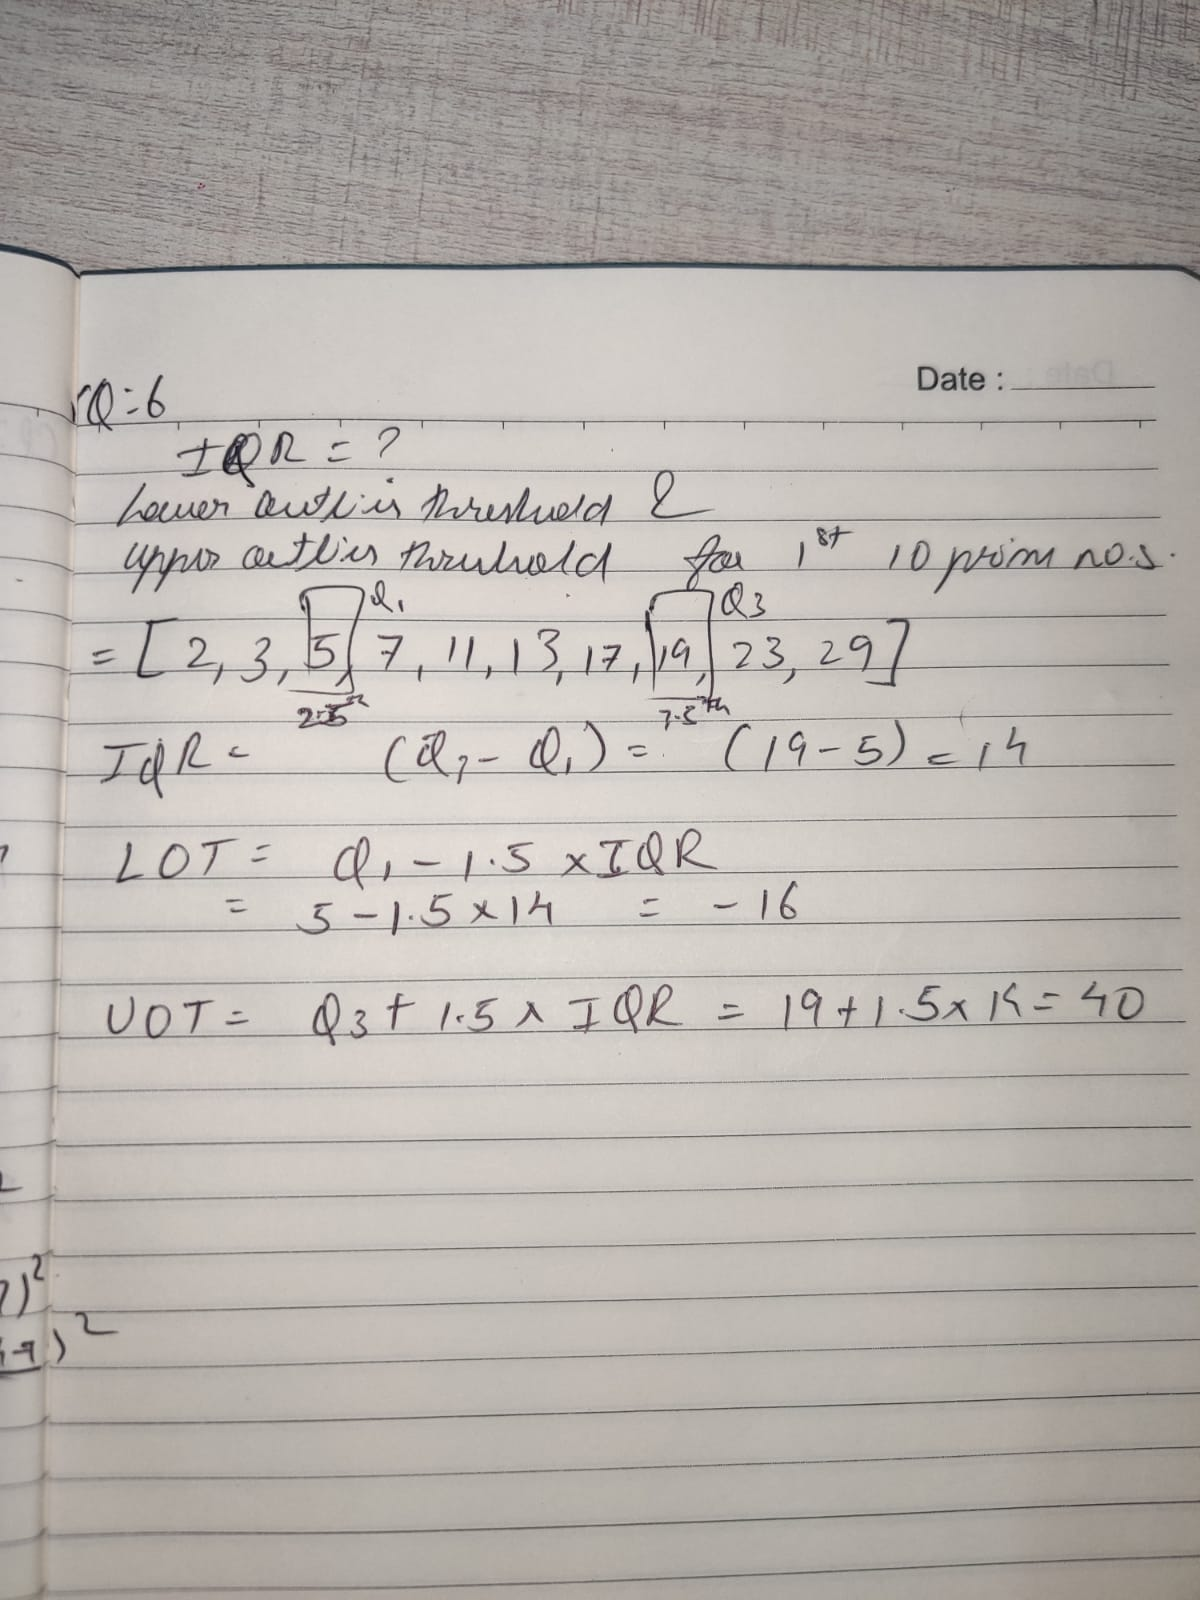Upload Your answer here.

# **MACHINE LEARNING**

## 7. What is the curse of dimensionality? Can you list some ways to deal with it?

The curse of dimentionality is the phenomenon where the model starts getting higher number of errors due to higher number of features in the dataset.

Higher dimemtions cause higher volume of the data. Working with this data will be computationally expensive and wont be the best thing to do.

This can be reduced by using methods that will reduce the number of features and figure out the features that will contribute the most for learning model.

**In order to reduce the dimentionality we can use multiple techniques like PCA , L1, L2 regularization.**

## 8. How do L1 and L2 regularization differ in improving the accuracy of machine learning models? Implications of using each technique and which technique is commonly preferred to boost the model’s accuracy rate and why?


L1 regularization- is a regularization technique that is used to reduce the number of features or eliminate the features so that the number of features decreases and the training of the model becomes easier.

Here we are removing a major chunk of noise data and outliers by default.

By doing this we can help the model to learn from the features and records that are the most important to the learning. Here the formula for L1 regularization is absolute and this will penalizes the feature to such an extent that the feature might get deleted.

L2 regularization- This is a similar regularization technique that we use for dimentionality reduction and penalizing the loss function. The only difference that we can see here is that we are squaring the penalty term for the loss function. This leads to removal of the features to a vast extent but we barely see elimination of the feature.

